## Data scaling

In [24]:
from libs.scaler import min_max_scaler
from libs.scaler import black_and_white_scaler
from libs.mnist_reader import load_mnist

X_train, Y_train = load_mnist(path="data/fashion", kind="train")

fashion_datasets = {
    "no_scaling": X_train,
    "black_and_white": black_and_white_scaler(X_train),
    "min_max": min_max_scaler(X_train)
}

In [25]:
X_train, Y_train = load_mnist(path="data/mnist", kind="train")

mnist_datasets = {
    "no_scaling": X_train,
    "black_and_white": black_and_white_scaler(X_train),
    "min_max": min_max_scaler(X_train)
}

## PCA both

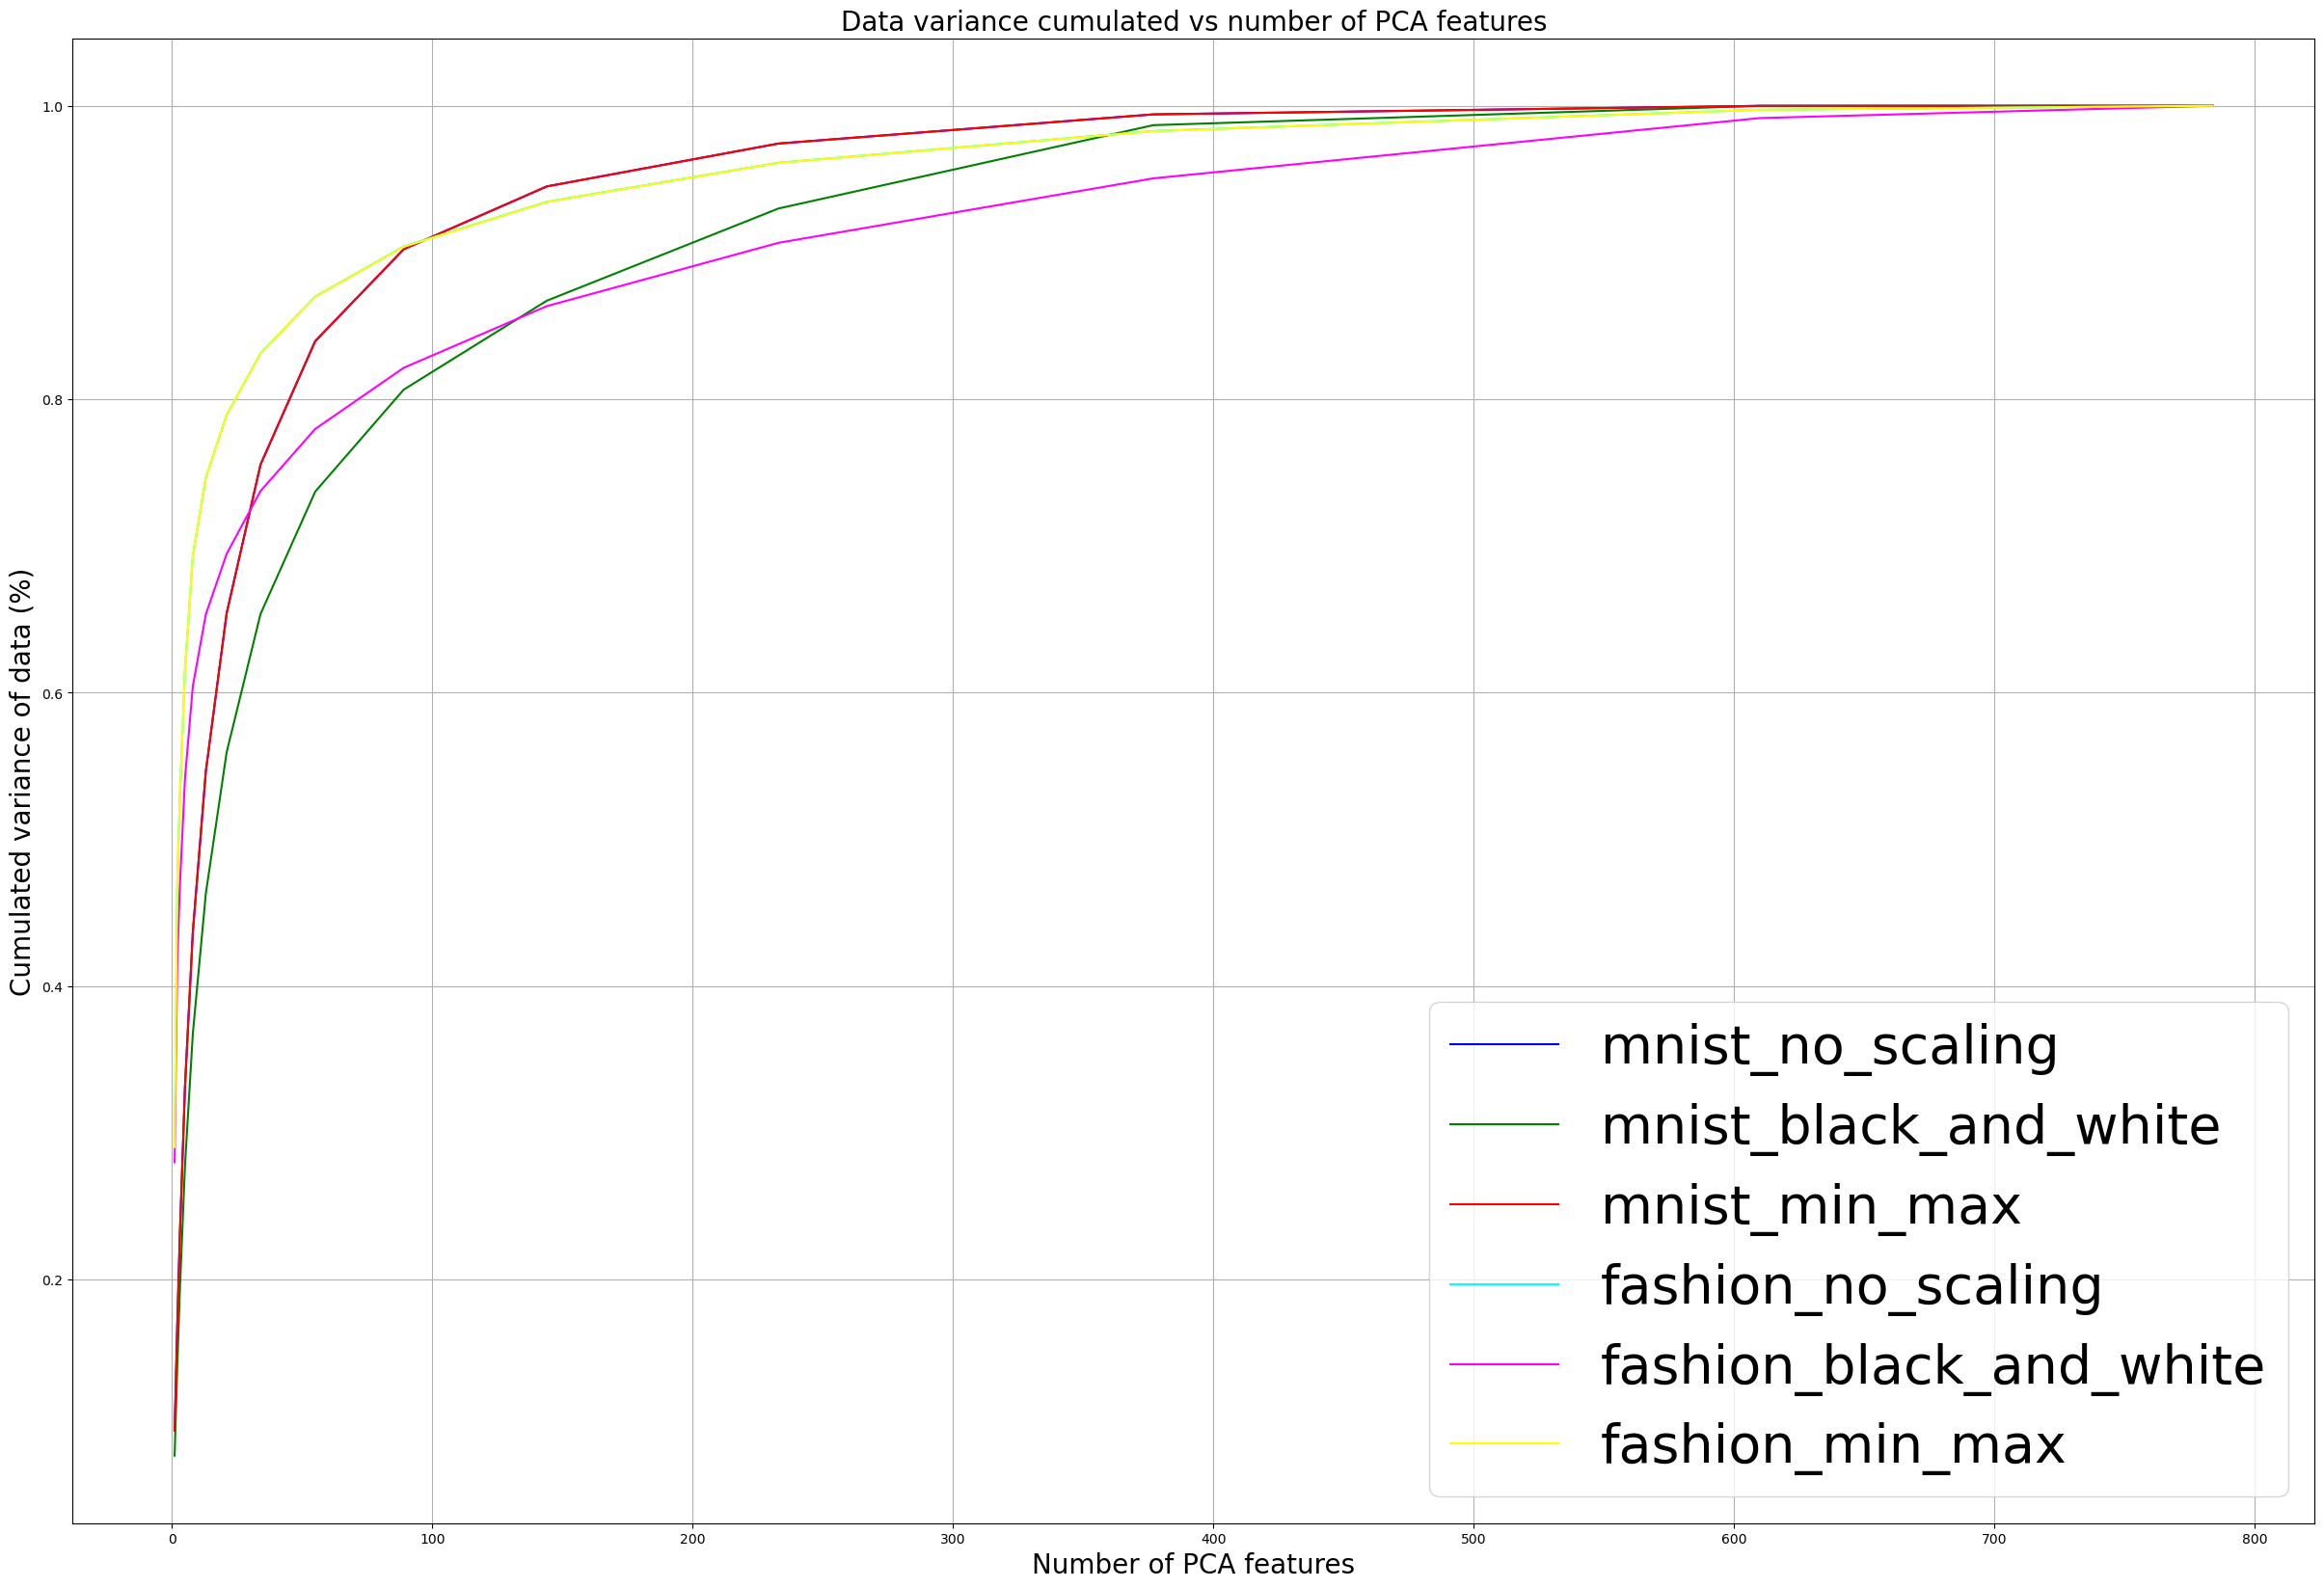

In [26]:
import numpy as np
from libs.mnist_reader import load_mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import random

def pca_alalisys(data: list):
    n_components = np.array([1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 784])

    cumul_variance = np.empty(len(n_components))
    n_features_90_index = 0

    for i, n in enumerate(n_components):
        pca = PCA(n_components=n)
        pca.fit(data)
        cumul_variance[i] = np.sum(pca.explained_variance_ratio_)
        if cumul_variance[i] < 0.91:
            n_features_90_index = i

    return n_components, cumul_variance, n_features_90_index


plt.figure(figsize=(30,20))
plt.grid(which='both')

convergence = []

for data in mnist_datasets:
    if data == "no_scaling":
        color = "blue"
    elif data == "black_and_white":
        color = "green"
    elif data == "min_max":
        color = "red"
    else:
        raise KeyError(f"{data} key is not specified in datasets")
    
    n_components, cumul_variance, n_features_90_index = pca_alalisys(mnist_datasets[data])
    percent = "{:.2f}%".format(100 * cumul_variance[n_features_90_index])
    convergence.append(f"mnist_{data} {n_components[n_features_90_index]} acounts for {percent} of variance")
    plt.plot(n_components, cumul_variance, color=color, label=f"mnist_{data}")

for data in fashion_datasets:
    if data == "no_scaling":
        color = "cyan"
    elif data == "black_and_white":
        color = "magenta"
    elif data == "min_max":
        color = "yellow"
    else:
        raise KeyError(f"{data} key is not specified in datasets")

    n_components, cumul_variance, n_features_90_index = pca_alalisys(fashion_datasets[data])
    percent = "{:.2f}%".format(100 * cumul_variance[n_features_90_index])
    convergence.append(f"fashion_{data} {n_components[n_features_90_index]} acounts for {percent} of variance")
    plt.plot(n_components, cumul_variance, color=color, label=f"fashion_{data}")


plt.xlabel('Number of PCA features', size=20)
plt.ylabel('Cumulated variance of data (%)', size=20)
plt.title('Data variance cumulated vs number of PCA features', size=20)
plt.legend(loc=4, prop={'size': 40})

plt.show()

In [27]:
for c in convergence:
    print(c)

mnist_no_scaling 89 acounts for 90.22% of variance
mnist_black_and_white 144 acounts for 86.72% of variance
mnist_min_max 89 acounts for 90.22% of variance
fashion_no_scaling 89 acounts for 90.41% of variance
fashion_black_and_white 233 acounts for 90.66% of variance
fashion_min_max 89 acounts for 90.39% of variance
